# Data Analysis Test

Use file `./ref/crop_data.csv` for input

Use `pandas` lib

Write your code and display readable result

In [290]:
import pandas as pd

In [291]:
# read csv file

df = pd.read_csv("./ref/crop_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   crop_year         11914 non-null  object 
 1   year              11914 non-null  int64  
 2   product           11914 non-null  object 
 3   province          11914 non-null  object 
 4   area_plant_rai    11769 non-null  float64
 5   area_harvest_rai  11728 non-null  float64
 6   production_ton    11692 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 651.7+ KB


### Example Question

How many "ยางพารา" produced in whole country ("ทั้งประเทศ")


In [292]:
# How many "ยางพารา" produced in whole country ("ทั้งประเทศ")
new_df = df.loc[
    (df["product"] == "ยางพารา" ) &
    (df["province"] == "ทั้งประเทศ") 
]
sum(new_df["production_ton"])


47686839.0

### Question 1

How many "ข้าวนาปี" produced in "ยะลา" between year 2550 - 2553


In [293]:
# Write you code and display question 1 result here.

# Check data in specific columns with unique function to overview data that could contain wrong format, spelling, or special characters
print("year_unique:", df['year'].unique())
print("product_unique:", df['product'].unique())
print("province_unique:", df['province'].unique())

q1_df = df.loc[
  (df["product"] == "ข้าวนาปี") &
  (df["province"] == "ยะลา") &
  ((df['year'] >= 2550) & (df['year'] <= 2553))   
]

print("\nHow many \"ข้าวนาปี\" produced in \"ยะลา\" between year 2550 - 2553")
print("Answer: ", sum(q1_df["production_ton"]))

year_unique: [2550 2551 2552 2553 2554 2555 2556 2557 2558 2559 2560 2561 2562]
product_unique: ['ข้าวนาปี' 'ข้าวนาปรัง' 'ข้าวโพดเลี้ยงสัตว์' 'มันสำปะหลัง' 'สับปะรด'
 'ถั่วเหลือง' 'ยางพารา' 'ปาล์มน้ำมัน' 'กาแฟ' 'ลำไย' 'ทุเรียน' 'เงาะ'
 'มังคุด' 'ลิ้นจี่' 'ลองกอง' 'พริกไทย' 'ส้มเขียวหวาน' 'มะนาว' 'หอมแดง'
 'กระเทียม' 'หอมหัวใหญ่' 'มันฝรั่ง' 'มะเขือเทศ' 'หน่อไม้ฝรั่ง'
 'ข้าวโพดหวาน' 'ข้าวโพดฝักอ่อน']
province_unique: ['ทั้งประเทศ' 'ภาคเหนือ' 'ภาคตะวันออกเฉียงเหนือ' 'ภาคกลาง' 'ภาคใต้'
 'เชียงราย' 'พะเยา' 'ลำปาง' 'ลำพูน' 'เชียงใหม่' 'แม่ฮ่องสอน' 'ตาก'
 'กำแพงเพชร' 'สุโขทัย' 'แพร่' 'น่าน' 'อุตรดิตถ์' 'พิษณุโลก' 'พิจิตร'
 'นครสวรรค์' 'อุทัยธานี' 'เพชรบูรณ์' 'เลย' 'หนองบัวลำภู' 'อุดรธานี'
 'หนองคาย' 'บึงกาฬ' 'สกลนคร' 'นครพนม' 'มุกดาหาร' 'ยโสธร' 'อำนาจเจริญ'
 'อุบลราชธานี' 'ศรีสะเกษ' 'สุรินทร์' 'บุรีรัมย์' 'มหาสารคาม' 'ร้อยเอ็ด'
 'กาฬสินธุ์' 'ขอนแก่น' 'ชัยภูมิ' 'นครราชสีมา' 'สระบุรี' 'ลพบุรี'
 'สิงห์บุรี' 'ชัยนาท' 'สุพรรณบุรี' 'อ่างทอง' 'พระนครศรีอยุธยา' 'นนทบุรี'
 'กรุงเทพมหานคร' 'ปทุมธานี' '

### Question 2

Calculate harvest rate of "ข้าวนาปี" in whole country

_harvest rate = area_harvest_rai / area_plant_rai_

In [294]:
# Write you code and display question 2 result here.
# replace with your code

# store only product "ข้าวนาปี" and provice "ทั้งประเทศ"(whole country) in rice_df
rice_df = df.loc[(df["product"] == "ข้าวนาปี") & (df["province"] == "ทั้งประเทศ")] 
# Check data contain other than numeric with inverting boolean mask and apply pandas is_number function
non_numeric_rows_1 = rice_df[~rice_df["area_harvest_rai"].apply(lambda x: pd.api.types.is_number(x))]
non_numeric_rows_2 = rice_df[~rice_df["area_plant_rai"].apply(lambda x: pd.api.types.is_number(x))]

# If case to check if there are non numeric in the columns
if non_numeric_rows_1.empty & non_numeric_rows_2.empty:
    print("No non-numeric values found in 'area_harvest_rai' and 'area_plant_rai'")
if not non_numeric_rows_1.empty:
    print("Non-numeric rows found 'area_harvest_rai':")
    print(non_numeric_rows_1)
if not non_numeric_rows_2.empty:
    print("Non-numeric rows found 'area_plant_rai':")
    print(non_numeric_rows_2)

# sum rice_df on columns area_harvest_rai and area_plant_rai to use in formula 
area_harvest_rai = sum(rice_df["area_harvest_rai"])   
area_plant_rai = sum(rice_df["area_plant_rai"])
harvest_rate = area_harvest_rai / area_plant_rai

# print total sum and rate with 3 decimals as it easy to read
print('area_harvest_rai', area_harvest_rai)
print('area_plant_rai', area_plant_rai)
print('harvest_rate', f"{harvest_rate:.3f}")

No non-numeric values found in 'area_harvest_rai' and 'area_plant_rai'
area_harvest_rai 730340255.0
area_plant_rai 783456906.0
harvest_rate 0.932


### Question 3

Calculate total profit of "ข้าวโพดฝักอ่อน" produced in "ภาคเหนือ" from year 2555 to 2562
- profit rate in year 2555 - year 2559 is 50% (selling price is 50THB/kg.)
- profit rate in year 2560 - year 2562 is 30% (selling price is 120THB/kg.)
- assume all product was sold out every year.


In [295]:
# Write you code and display question 3 result here.

# store only product "ข้าวโพดฝักอ่อน" and provice "ภาคเหนือ" in corn_df
corn_df = df.loc[(df["product"] == "ข้าวโพดฝักอ่อน") & 
                 (df["province"] == "ภาคเหนือ") & 
                 (df["year"] >= 2555) & (df["year"] <= 2562)
]

# store data in two df base on selected year (2555-2559) and (2560-2562)
corn_year_2555_2559 = corn_df.loc[(corn_df["year"] >= 2555) & (corn_df["year"] <= 2559)]
corn_year_2560_2562 = corn_df.loc[(corn_df["year"] >= 2560) & (corn_df["year"] <= 2562)]

# assum production_ton columns meaning that unit is ton, so 1 ton = 1000kg then selling price per kg to ton will mutiply by 1000
selling_price_1_per_kg = 50
corn_year_2555_2559["selling_price_per_ton"] = selling_price_1_per_kg * 1000
corn_year_2555_2559["income"] = (corn_year_2555_2559["production_ton"] * corn_year_2555_2559["selling_price_per_ton"]).astype('int64')
# profit rate in year 2555 - year 2559 is 50% (selling price is 50THB/kg.)
corn_year_2555_2559["profit_thb"] = corn_year_2555_2559["income"] * 50/100

selling_price_2_per_kg = 120
corn_year_2560_2562["selling_price_per_ton"] = selling_price_2_per_kg * 1000
corn_year_2560_2562["income"] = (corn_year_2560_2562["production_ton"] * corn_year_2560_2562["selling_price_per_ton"]).astype('int64')
# profit rate in year 2560 - year 2562 is 30% (selling price is 120THB/kg.)
corn_year_2560_2562["profit_thb"] = corn_year_2560_2562["income"] * 30/100

# concat two df to have corn_year from 2555 to 2562
corn_year_2559_2562 = pd.concat([corn_year_2555_2559, corn_year_2560_2562], ignore_index=True)

# sum total_profit on columns profit_thb 
total_profit = sum(corn_year_2559_2562["profit_thb"])


print("Calculate total profit of \"ข้าวโพดฝักอ่อน\" produced in \"ภาคเหนือ\" from year 2555 to 2562")
print("Answer: ", "{:,} THB".format(total_profit))
print("or around", f"{total_profit/1000000000:.2f} billion THB")

Calculate total profit of "ข้าวโพดฝักอ่อน" produced in "ภาคเหนือ" from year 2555 to 2562
Answer:  5,076,935,000.0 THB
or around 5.08 billion THB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19680\2953372250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_year_2555_2559["selling_price_per_ton"] = selling_price_1_per_kg * 1000
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19680\2953372250.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_year_2555_2559["income"] = (corn_year_2555_2559["production_ton"] * corn_year_2555_2559["selling_price_per_ton"]).astype('int64')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19680\2953372250.py:18: S

### Question 4

Form question 3, display the dataframe with 'year', 'production_ton', 'income', 'profit_thb' column


In [296]:
# Write you code and display question 4 result here.

corn_year_2559_2562[["year","production_ton", "income", "profit_thb"]]

,year,production_ton,income,profit_thb
0,2555,24741.0,1237050000,618525000.0
1,2556,25371.0,1268550000,634275000.0
2,2557,21788.0,1089400000,544700000.0
3,2558,20499.0,1024950000,512475000.0
4,2559,19332.0,966600000,483300000.0
5,2560,21329.0,2559480000,767844000.0
6,2561,21757.0,2610840000,783252000.0
7,2562,20349.0,2441880000,732564000.0


### Question 5

We plan to invest in growing soybeans (ถั่วเหลือง) which province should we invest.

We looking for
- high protential area (high havest_rate)
- we want market share only 20% but production_ton should be more than 2000 in the past (2550 - 2562)



In [397]:

# Write you code and display question 5 result here.

exclude_province = ['ทั้งประเทศ', 'ภาคเหนือ', 'ภาคตะวันออกเฉียงเหนือ', 'ภาคกลาง', 'ภาคใต้']
# store only product "ถั่วเหลือง" except exclude_province in soy_df
soy_df = df.loc[(df["product"] == "ถั่วเหลือง") & (~df["province"].isin(exclude_province))]
# check any duplicate columns 
if soy_df[soy_df.duplicated(subset=['year', 'province'])].empty:
    print("no duplicate")
else: print("drop duplicate row", df.drop_duplicates(subset=['year', 'province']))

# As we looking to invest in specific province, we will focus on whole year first
# Use pandas function group by province to acquire area_harvest_rai, area_plant_rai, production_ton, then calculate harvest_rate
harvest_rate_df = pd.DataFrame(soy_df.groupby('province')['area_harvest_rai'].sum().astype(int))
harvest_rate_df["area_plant_rai"] = pd.DataFrame(soy_df.groupby('province')['area_plant_rai'].sum().astype(int))
harvest_rate_df["production_ton"] = pd.DataFrame(soy_df.groupby('province')['production_ton'].sum().astype(int))
harvest_rate_df["harvest_rate"] = (harvest_rate_df["area_harvest_rai"] / harvest_rate_df["area_plant_rai"]).astype(float).round(3)

# As we calculate whole year and sort top 10 production_ton and harvest_rate 
harvest_top = harvest_rate_df.sort_values(by=["production_ton", "harvest_rate"], ascending=False)[0:10]

no duplicate


"แม่ฮ่องสอน" have highest harvest_rate at 0.992 with production_ton 216,298

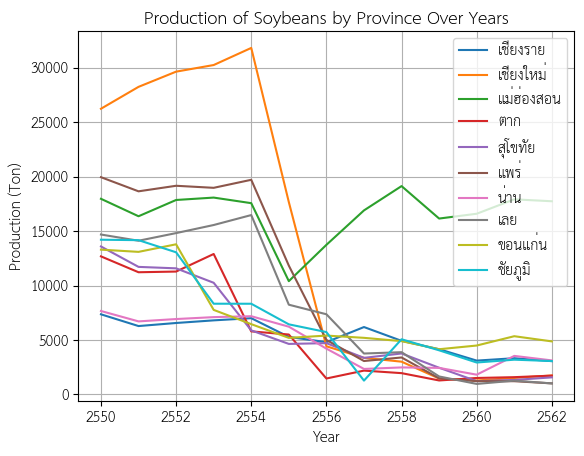

In [398]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# We use matplot to display graph to see top 10 from following data

soy_plot = soy_df.loc[(soy_df["province"].isin(harvest_top.index))]

provinces = soy_plot['province'].unique()

for province in provinces:
    province_data = soy_plot[soy_plot['province'] == province]
    plt.plot(province_data['year'], province_data['production_ton'], label=province)

plt.xlabel('Year')
plt.ylabel('Production (Ton)')
plt.title('Production of Soybeans by Province Over Years')
plt.legend()
plt.grid(True)
plt.show()

"เชียงใหม่" have highest production_ton in 2554 while it sharply decline in year 2556 and still decrease over year
while "แม่ฮ่องสอน" slightly decrease during 2554 - 2555 then bounce back over year till 2562

In [370]:
# As we want production_ton should be more than 2000 in the past (2550 - 2562), so we need to filter on production_ton and year
soy_over2000_df = soy_df[(soy_df["production_ton"] > 2000) & (soy_df["year"] >= 2550) & (soy_df["year"] <= 2562)]

harvest_rate_2000_df = pd.DataFrame(soy_over2000_df.groupby('province')['area_harvest_rai'].sum().astype(int))
harvest_rate_2000_df["area_plant_rai"] = pd.DataFrame(soy_over2000_df.groupby('province')['area_plant_rai'].sum().astype(int))
harvest_rate_2000_df["production_ton"] = pd.DataFrame(soy_over2000_df.groupby('province')['production_ton'].sum().astype(int))
harvest_rate_2000_df["harvest_rate"] = (harvest_rate_2000_df["area_harvest_rai"] / harvest_rate_2000_df["area_plant_rai"]).astype(float).round(3)
# then use same formula and add new columns with market share only 20% 
harvest_rate_2000_df["market_share"] = harvest_rate_2000_df["production_ton"] * 20/100

top_10 = harvest_rate_2000_df.sort_values(by=["production_ton", "harvest_rate"], ascending=False)[0:10]
top_10

,area_harvest_rai,area_plant_rai,production_ton,harvest_rate,market_share
province,,,,,
แม่ฮ่องสอน,690424,696220,216298,0.992,43259.6
เชียงใหม่,588706,599365,174554,0.982,34910.8
แพร่,500249,505300,119702,0.990,23940.4
เลย,372041,391881,98856,0.949,19771.2
ขอนแก่น,380054,392130,93938,0.969,18787.6
ชัยภูมิ,378083,391395,88553,0.966,17710.6
สุโขทัย,250832,264072,71932,0.950,14386.4
เชียงราย,301801,306223,68852,0.986,13770.4
ตาก,250254,256160,61549,0.977,12309.8


As we filter production_ton should be more than 2000 with added market share
"แม่ฮ่องสอน" still have the highest production_ton and market_share while the rest have slightly change on number and rank

Therefore "แม่ฮ่องสอน" is worth to invest in growing soybeans (ถั่วเหลือง) 